In [1]:
import os
import sys

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [10]:
top_dir = "csvs/"
csvs = [os.path.join(top_dir, csv) for csv in sorted(list(os.listdir(top_dir)))]
for i,csv in enumerate(csvs):
    print(i,csv)

0 csvs/attn_patch_emd.csv
1 csvs/attn_patch_emd_individuated_layer.csv
2 csvs/attn_patch_emd_individuated_layer_pos.csv
3 csvs/das_emd.csv
4 csvs/indy_attn_patch_emd.csv
5 csvs/mean_diff_all_layers_and_pos.csv
6 csvs/mean_diff_individuated_layers_all_pos.csv
7 csvs/sae_emd.csv


In [11]:
#idxs = list(range(len(csvs)))
idxs = [3,6,7]

In [12]:
dfs = []
for idx in idxs:
    df = pd.read_csv(csvs[idx])
    dfs.append(df)
emd_df = pd.concat(dfs)
emd_df
    
    

,sample_id,mse,emd,base_emd,method,pos,layer,diff
0,0,0.86341,3648.55615,1880.34875,das,NaN,NaN,NaN
1,1,0.86341,3652.29956,1923.42676,das,NaN,NaN,NaN
2,2,0.86341,3641.78027,1873.40381,das,NaN,NaN,NaN
3,3,0.86341,3642.05908,1788.78931,das,NaN,NaN,NaN
4,4,0.86341,3649.31274,1722.91040,das,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
5,5,0.58741,4026.49414,1972.00464,sae,NaN,NaN,NaN
6,6,0.58741,4048.71582,1956.28564,sae,NaN,NaN,NaN
7,7,0.58741,4044.26562,2019.49915,sae,NaN,NaN,NaN
8,8,0.58741,4025.14893,1947.26855,sae,NaN,NaN,NaN


In [13]:
emd_df["diff"] = emd_df["emd"]-emd_df["base_emd"]
emd_df["ratio"] = emd_df["emd"]/emd_df["base_emd"]
emd_df["percent"] = (emd_df["emd"]-emd_df["base_emd"])/emd_df["base_emd"]

In [14]:
drop_methods = {"indy attn patch"}

In [15]:
demd_df = emd_df.loc[~emd_df["method"].isin(drop_methods)]

In [17]:
set(demd_df["method"])

{'das', 'mean_diff', 'sae'}

In [18]:
names = {
    "das": "DAS",
    "sae": "SAE",
    "mean_diff": "Mean Diff",
}
ordering = {
    "mean_diff": 0,
    "sae": 1,
    "das": 2,
}

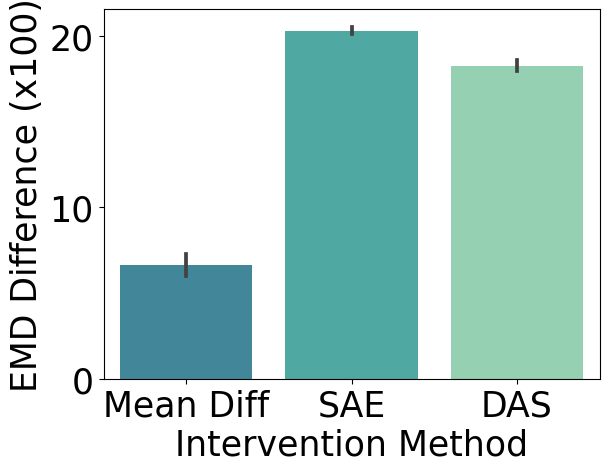

In [27]:
fontsize=25
titlesize=30
legendsize=25
ticksize=25
labelsize=25

fig = plt.figure()
palette = [p for i,p in enumerate(sns.color_palette("mako")) if i>2]
demd_df["xlabel"] = demd_df.apply(lambda x: names[x.method], axis=1)
demd_df["sort_order"] = demd_df.apply(lambda x: ordering[x.method], axis=1)
demd_df = demd_df.sort_values(by="sort_order")
sns.barplot(x="xlabel", y="diff", palette=palette, data=demd_df)

plt.xticks(fontsize=ticksize)
plt.yticks([0,1000,2000], [0, 10, 20], fontsize=ticksize)

plt.xlabel("Intervention Method", fontsize=labelsize)
plt.ylabel("EMD Difference (x100)", fontsize=labelsize)

plt.savefig("figs/emd_difference.png", dpi=600, bbox_inches="tight")
plt.show()

In [24]:
agg_df = emd_df.groupby(["method"])[["emd","base_emd"]].mean().reset_index()
agg_df["ratio"] = agg_df["emd"]/agg_df["base_emd"]
agg_df["percent"] = (agg_df["emd"]-agg_df["base_emd"])/agg_df["base_emd"]

SyntaxError: incomplete input (4291586243.py, line 4)